In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from statsmodels.distributions.empirical_distribution import ECDF

def from_big_text(data:str,splitter:str):
    
    index = pd.Index('''Объем выборки до удаления пропущенных данных
Количество пропущенных данных (NA)
Объем выборки после удаления пропущенных данных
Минимальное значение в вариационном ряду
Максимальное значение в вариационном ряду
Размах выборки
Значение первой квартили (Q1)
Значение медианы (Q2)
Значение третьей квартили (Q3)
Квартильный размах
Среднее выборочное значение
Стандартное отклонение (S) корень из дисп.в (исправленной)
Исправленная дисперсия 
Эксцесс
Коэффициент асимметрии
Ошибка выборки
Значение 63%-квантили
Мода
Как часто встречается "мода"
Верхняя граница нормы (Xst_max)
Нижняя граница нормы (Xst_min)
Количество выбросов ниже нижней нормы
Количество выбросов выше верхней нормы
'''.split('\n'))
    
    data_list=[]
    df=pd.DataFrame([float(i) if i!='NA' else np.nan for i in data.split(splitter)])
    
    length_before=df.size
    data_list.append(length_before)
    
    df=df.dropna()
    length_after=df.size
    data_list.extend([length_after-length_before,length_after])
    
    minn=df.describe().loc['min'].values[0]
    maxx=df.describe().loc['max'].values[0]
    data_list.extend([minn,maxx,maxx-minn])
    
    Q1=df.describe().loc['25%'].values[0]
    Q2=df.describe().loc['50%'].values[0]
    Q3=df.describe().loc['75%'].values[0]
    
    mean = df.describe().loc['mean'].values[0]
    
    data_list.extend([Q1,Q2,Q3,Q3-Q1,mean,df.std(ddof=1)[0],df.var(ddof=1)[0],df.kurt()[0],df.skew()[0]])
    
    data_list.append(data_list[11]/data_list[2]**0.5)
    data_list.extend(df.quantile(0.63))
    
    if df.mode().count()[0] == df.count().iloc[0]:
        data_list.append(0)
        data_list.append(0)
    else:
        data_list.append(df.mode().iloc[0,0])
        data_list.append(df.value_counts()[df.mode().iloc[0,0]])
        
    data_list.extend([data_list[8]+1.5*data_list[9],data_list[6]-1.5*data_list[9]])
    data_list.extend([len(df[df.iloc[:,0]<data_list[20]]),len(df[df.iloc[:,0]>data_list[19]])])
    
    df.boxplot()
    plt.xlabel('Ящик с усами до очистки')
    plt.show()

    clean_df=df[(df.iloc[:,0]>data_list[20]) & (df.iloc[:,0]<data_list[19])]
    clean_df.boxplot()
    plt.xlabel('Ящик с усами после очистки (Без NA и выбросов)')
    plt.show()
    
    
    return pd.DataFrame(data_list,index[:len(data_list)])

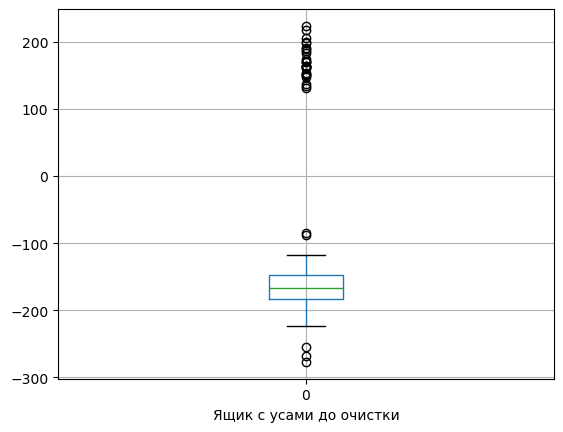

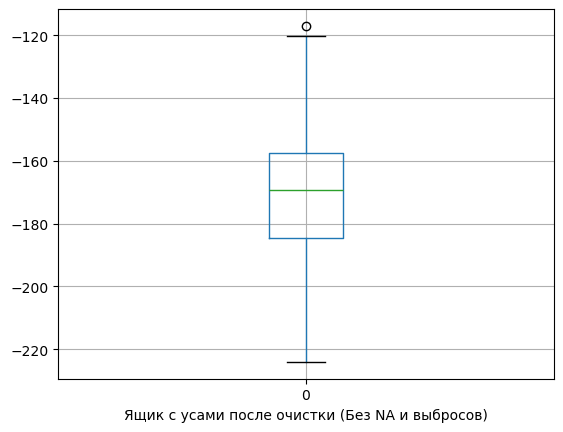

,0
Объем выборки до удаления пропущенных данных,300.000000
Количество пропущенных данных (NA),-21.000000
Объем выборки после удаления пропущенных данных,279.000000
Минимальное значение в вариационном ряду,-277.006400
Максимальное значение в вариационном ряду,223.750800
Размах выборки,500.757200
Значение первой квартили (Q1),-182.824550
Значение медианы (Q2),-166.796900
Значение третьей квартили (Q3),-146.823000
Квартильный размах,36.001550


In [24]:
text='-194.3779; -177.7017; NA; -190.9091; -170.5325; -168.1535; -197.1981; -122.5442; -181.6037; -196.2927; NA; -87.3432; -207.3771; -143.9177; -189.7354; -194.9819; -165.5695; -165.3043; 171.8495; -168.1425; -169.1902; -151.1296; -208.1701; -169.2235; -189.7955; NA; -172.3725; 183.0272; -221.2799; -139.1868; -160.088; -124.0217; -117.0158; -196.7869; -168.8747; 199.7569; -170.2329; -157.5982; -182.6017; NA; -198.2757; -173.3341; -197.0221; -176.617; 174.4793; -183.0195; -137.0551; -166.65; -161.1568; -204.9911; -137.6051; -85.022; -174.6369; -156.7334; -154.6654; -181.0034; -165.9679; -185.8001; -164.5037; -191.5906; -164.718; 205.4555; -160.3067; -212.2588; -161.5747; -189.3608; -146.8366; -194.0602; -166.7969; 191.3017; -162.0666; -168.4299; -210.1714; NA; -154.0824; -168.8861; -181.1642; -167.2657; 188.7629; -143.8932; -184.1726; -148.415; -163.2136; -179.3092; -158.3453; -152.927; 169.3517; -144.0586; -166.0867; -157.7147; -159.9157; -147.8518; -175.8872; -124.973; 149.9945; -255.031825; -130.5202; -209.4644; -125.7248; -165.9567; NA; -163.1068; -157.7618; -177.4579; -193.1898; -172.972; -172.5896; -145.9725; -164.5577; -124.0417; -160.3465; 134.8341; -161.6984; -165.9788; NA; -143.0549; -132.854; -137.7801; -193.0964; -184.9669; 151.5307; -185.057; -204.1557; -170.7604; -162.6274; -170.9198; -139.1593; -187.4823; 223.7508; -189.2962; -164.1744; -162.9236; -146.3165; NA; -163.4765; -163.3982; -163.5342; 198.4725; -202.5708; -178.5649; -224.0032; -168.6664; -195.6848; -158.2784; -132.0059; 162.5579; -143.5323; -175.7604; -177.9567; -151.2079; -125.5979; -187.1473; NA; -175.7593; 151.24; NA; -202.8399; -185.4153; -168.6321; -181.5665; -205.8899; -277.0064; NA; -173.3101; -128.5103; -172.5604; -154.2079; NA; -194.478; -161.6489; -163.2809; -176.994; -165.0078; 162.7372; -169.5874; -144.1649; -167.4255; -176.5829; -150.7951; -180.9425; -165.5115; 164.5462; -143.4277; -166.3309; -206.4914; -166.7015; -194.746; -148.9638; -191.2921; 169.9044; -186.2946; -215.7937; -149.0729; -146.4595; -189.1966; -165.4463; -212.4083; 186.8488; -165.2698; -146.8094; -185.0691; -159.2846; -124.6157; NA; -183.5672; -198.9645; 131.4182; NA; -196.0557; -202.8279; -164.7111; -140.1387; -184.423; -176.7473; -214.8683; 217.3961; -175.5419; -172.1291; -197.2019; -189.5526; -206.0636; -168.6153; -157.2746; 136.4666; -184.4911; -176.362; -161.5741; -177.9463; -172.3879; -172.095; -178.5666; 152.9071; NA; -176.4159; -162.2979; -161.6216; -182.6296; -173.2591; NA; -200.2; -131.9886; -173.4903; -174.1179; -143.78; -192.1052; NA; -155.9192; -156.6437; -157.2762; -144.4429; 147.86; NA; -177.8253; -175.6016; NA; -190.1326; -171.2815; -184.9209; -137.929; -164.9219; -175.851; -155.4942; -168.2686; -162.7573; -127.2019; -188.4408; -189.451; -189.4407; 161.4335; -219.0344; NA; -172.7585; -158.4946; -150.4887; -132.1469; -162.99; -169.8512; 162.7875; NA; -130.4107; -120.2871; -171.8417; -180.7133; -176.3202; -171.8288; -163.8611; 164.0547; -131.1598; -134.2916; -177.699; -268.3541; -154.5068; -167.0612; -136.12; -187.417; -170.5064; -134.3572; -179.4004; -187.3903; -203.872'
from_big_text(text,'; ')

In [25]:
def name_task(text,splitter):
    
    data= pd.Series(list(map(int, text.split(splitter))))
    mu=data.mean()
    sigma = data.std(ddof=0)

    X=scipy.stats.norm(mu,sigma)

    L = X.ppf(0.25)
    H = X.ppf(0.75)

    lenLH = len(data[np.logical_and(data>=L,data<=H)])


    Fexp = ECDF(data)

    fig, ax = plt.subplots(figsize=(6,5))
    xx=np.linspace(X.ppf(0.01),X.ppf(0.99),1000)
    ax.plot(xx,X.cdf(xx))
    ax.plot(xx,Fexp(xx))
    plt.show()
    data_sort=np.sort(data)

    length_ff=max([max(np.abs((i+1)/len(data)-X.cdf(data_sort[i])),np.abs((i)/len(data)-X.cdf(data_sort[i]))) for i in range(len(data))]) # equals to scipy.stats.kstest(data,X.cdf)[0]

    dict_k=list(zip('среднее арифметическое ПД ,эмпирическое стандартное отклонение ПД ,квартиль L,квартиль Н,количество ПД от L до H,Расстояние мужду функциями распределения'.split(','),[mu,sigma,L,H,lenLH,length_ff]))
    for i in dict_k:
        print(i[0]+' = '+str(i[1]))


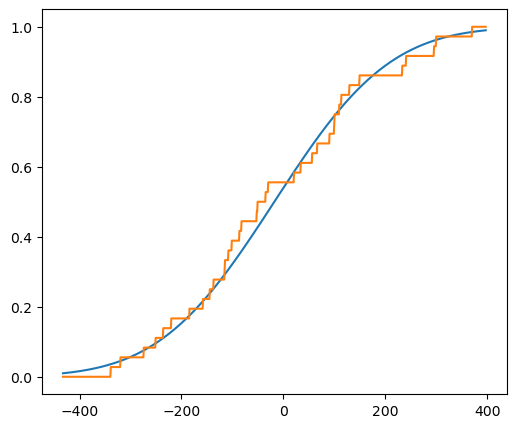

среднее арифметическое ПД  = -17.86111111111111
эмпирическое стандартное отклонение ПД  = 178.2157170986545
квартиль L = -138.06578561799813
квартиль Н = 102.34356339577592
количество ПД от L до H = 18
Расстояние мужду функциями распределения = 0.0870775276709288


In [27]:
text='295, −158, −51, 34, 109, −53, −185, 233, −251, −320, −274, −116, 370, −83, 149, 66, −108, −236, −87, −30, 113, −35, 56, −220, 20, −339, 90, 240, 100, −115, −137, 129, 99, −102, 299, −145'
name_task(text.replace('−', '-'),', ')